In [1]:
%load_ext autoreload
%autoreload 2

import fastai
from fastai import *
from fastai.vision import *

In [2]:
fastai.__version__

'1.0.57'

In [4]:
lesson_dir_path = Path('/home/justin/justinblaber/fastai_course/lesson1-mnist')
data_dir_path = untar_data(URLs.MNIST_SAMPLE, dest=lesson_dir_path)

In [5]:
tfms = get_transforms(do_flip=False)

In [6]:
data = (ImageList.from_folder(path=data_dir_path)
                 .split_by_folder()
                 .label_from_folder()
                 .transform(tfms, padding_mode='zeros')
                 .databunch()
                 .normalize())

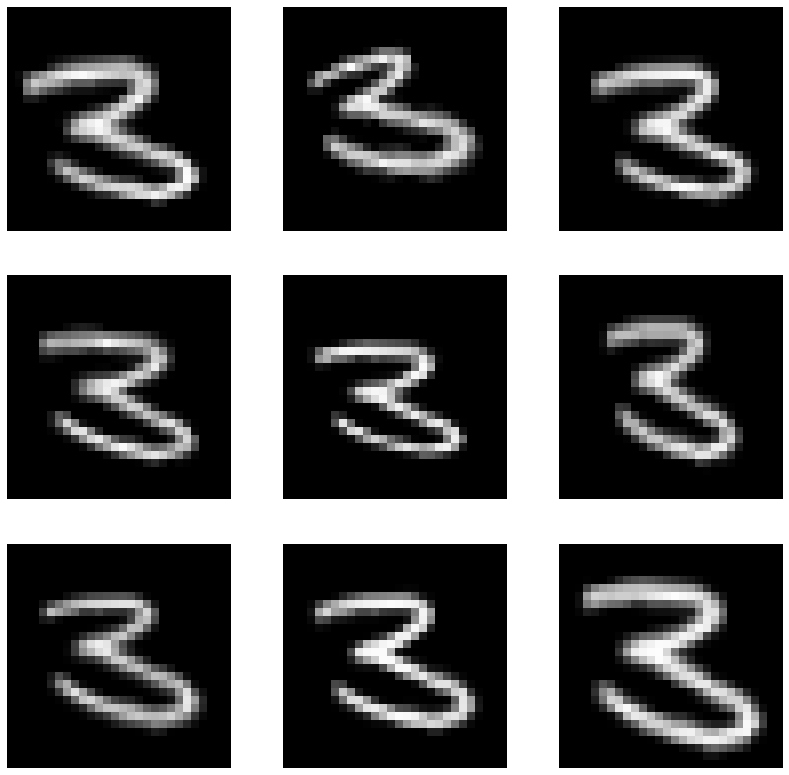

In [7]:
plot_multi(lambda i,j,ax : data.train_ds[2][0].show(ax), 3, 3, figsize=(14,14))

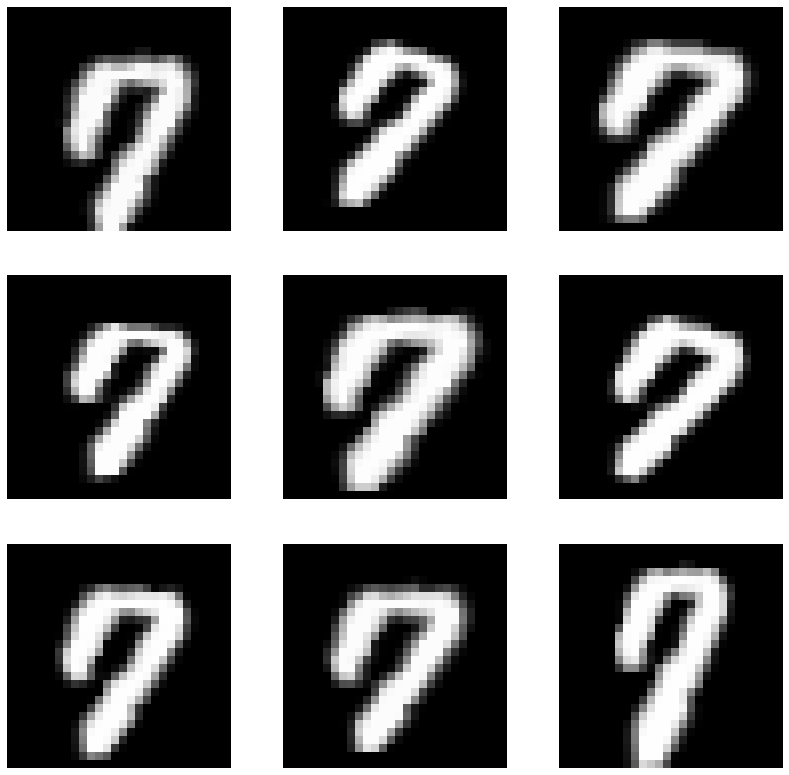

In [8]:
plot_multi(lambda i,j,ax : data.train_ds[8000][0].show(ax), 3, 3, figsize=(14,14))

# Resnet18

### Try defaults; do not use pretrained

In [9]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, pretrained=False)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


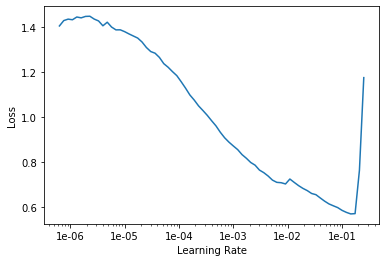

In [10]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [11]:
lr = 1e-3
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.089071,0.027059,0.989696,00:04
1,0.067883,0.069495,0.979392,00:04
2,0.044509,0.007262,0.998528,00:04
3,0.034660,0.001981,0.999509,00:04
4,0.031135,0.009707,0.997547,00:04
5,0.022133,0.003978,0.999019,00:04
6,0.014373,0.012478,0.997547,00:04
7,0.007545,0.002008,0.999019,00:04
8,0.003775,0.001779,0.999019,00:04
9,0.003424,0.002913,0.999019,00:04
